In [467]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [468]:
travel_test = pd.read_csv("C:/Users/kulpu/Downloads/Traveldata_train_(2).csv")
travel_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [469]:
survey_test = pd.read_csv("C:/Users/kulpu/Downloads/Surveydata_train_(2).csv")

In [470]:
combined_data = pd.merge(travel_test,survey_test)

In [471]:
combined_data.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [472]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [473]:
# check for distribution of numeric values.

combined_data.describe()

# Look at the outliers in the data -- the extreme max distance is 7k, something which is rather odd since Japan is an island
# country and such a large distance seems rather strange?? But even median travel distance is quite large...
# Departure delay of 1592min is certainly wrong, along with arrival delay. Need to investigate using a graph for other outliers.


,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000,94379.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222,0.546658
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409,0.497821
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000,1.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000,1.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000,1.000000


In [474]:
# check for missing values.



In [475]:
# Check the object columns:

objvar = combined_data.select_dtypes("object").columns
print(objvar)
for var in objvar:
    print(combined_data[var].value_counts(normalize=True))

Index(['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')
Female    0.507041
Male      0.492959
Name: Gender, dtype: float64
Loyal Customer       0.817332
Disloyal Customer    0.182668
Name: Customer_Type, dtype: float64
Business Travel    0.688373
Personal Travel    0.311627
Name: Type_Travel, dtype: float64
Eco         0.522807
Business    0.477193
Name: Travel_Class, dtype: float64
Acceptable           0.224326
Needs Improvement    0.222079
Good                 0.218357
Poor                 0.160998
Excellent            0.137524
Extremely Poor       0.036716
Name: Seat_Comfort, dtype: float64
Green Car    0.502601
Ordinary     0.497399
Na

In [476]:
# Check the missing object columns:

for var in objvar:
    print(combined_data[var].isnull().value_counts(normalize=True))
    print('*'*50)



False    0.999184
True     0.000816
Name: Gender, dtype: float64
**************************************************
False    0.905159
True     0.094841
Name: Customer_Type, dtype: float64
**************************************************
False    0.902245
True     0.097755
Name: Type_Travel, dtype: float64
**************************************************
False    1.0
Name: Travel_Class, dtype: float64
**************************************************
False    0.999354
True     0.000646
Name: Seat_Comfort, dtype: float64
**************************************************
False    1.0
Name: Seat_Class, dtype: float64
**************************************************
False    0.905381
True     0.094619
Name: Arrival_Time_Convenient, dtype: float64
**************************************************
False    0.907384
True     0.092616
Name: Catering, dtype: float64
**************************************************
False    0.999682
True     0.000318
Name: Platform_Location, dtype: flo

In [477]:
# The columns that are significantly (>8%) missing are Customer_Type, Type_Travel, Arrival Time Convenient, 
# Catering, Onboard Service. We should consider replacing them via a K-NN method as opposed to a simple median or mean method.
# Thy could be of feature importance.

In [478]:
# Check the missing num columns:

numvar = combined_data.select_dtypes('number').columns

for var in numvar:
    print(combined_data[var].isnull().value_counts(normalize=True))
    print('*'*50)

False    1.0
Name: ID, dtype: float64
**************************************************
False    0.99965
True     0.00035
Name: Age, dtype: float64
**************************************************
False    1.0
Name: Travel_Distance, dtype: float64
**************************************************
False    0.999396
True     0.000604
Name: Departure_Delay_in_Mins, dtype: float64
**************************************************
False    0.996217
True     0.003783
Name: Arrival_Delay_in_Mins, dtype: float64
**************************************************
False    1.0
Name: Overall_Experience, dtype: float64
**************************************************


In [479]:
# Convert the object data types to Categorical.
cols = combined_data.select_dtypes('object').columns.tolist()

cols.append('Overall_Experience')

for var in cols:
    combined_data[var]=combined_data[var].astype('category')

# No significant missing values. Can replace all with K-NN method.

# define imputer
from sklearn.impute import KNNImputer
from numpy import isnan
data = combined_data[numvar].values
ix = [i for i in range(data.shape[1]) if i!= 5]
X, y = data[:, ix], data[:, 5]
print(X)
print('Missing: %d' % sum(isnan(X).flatten()))
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(X)
data_trans = imputer.transform(X)
data_trans1 = pd.DataFrame(data_trans)
data_trans1 = data_trans1.rename(columns = {0:'ID',1:'AGE_C',2:'Travel_Distance_C',3:'Departure Delay (Mins)_C',4:'Arrival Delay (Mins)_C'})

data_trans1['ID'] = data_trans1['ID'].astype('int')
data_trans1.head()
data_trans1.info()
#print('Missing: %d' % sum(isnan(data_trans).flatten()))

[[9.8800001e+07 5.2000000e+01 2.7200000e+02 0.0000000e+00 5.0000000e+00]
 [9.8800002e+07 4.8000000e+01 2.2000000e+03 9.0000000e+00 0.0000000e+00]
 [9.8800003e+07 4.3000000e+01 1.0610000e+03 7.7000000e+01 1.1900000e+02]
 ...
 [9.8894377e+07 6.3000000e+01 2.7940000e+03 0.0000000e+00 0.0000000e+00]
 [9.8894378e+07 1.6000000e+01 2.7440000e+03 0.0000000e+00 0.0000000e+00]
 [9.8894379e+07 5.4000000e+01 2.1070000e+03 2.8000000e+01 2.8000000e+01]]
Missing: 447
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        94379 non-null  int32  
 1   AGE_C                     94379 non-null  float64
 2   Travel_Distance_C         94379 non-null  float64
 3   Departure Delay (Mins)_C  94379 non-null  float64
 4   Arrival Delay (Mins)_C    94379 non-null  float64
dtypes: float64(4), int32(1)
memory usage: 3.2 MB


In [480]:
# Identify the missing binary flag for the code:

def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

# Identify missing columns first. 
missing_col = [col for col in combined_data.columns if combined_data[col].isnull().any()]

#for colmn in missing_col:
 #   add_binary_flag(combined_data,colmn)


#### Replace the categorical data with the mode values:
cleaned_data = combined_data
cat_col = cleaned_data[missing_col].select_dtypes('category').columns.tolist()

for col in cat_col:
    cleaned_data[col].fillna(cleaned_data[col].mode()[0], inplace=True)
    

# Merge the replaced data with the combined data

cleaned_data = pd.merge(combined_data, data_trans1)
cleaned_data.head()

# Drop remaining ;llko
cleaned_data = cleaned_data.drop(columns = ['Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins','Age'],axis=1) 

cleaned_data = cleaned_data.rename(columns = {'AGE_C':'Age','Travel_Distance_C':'Travel_Distance','Departure Delay (Mins)_C':'Departure_Delay_In_Mins','Arrival Delay (Mins)_C':'Arrival_Delay_In_Mins'})

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       94379 non-null  int64   
 1   Gender                   94379 non-null  category
 2   Customer_Type            94379 non-null  category
 3   Type_Travel              94379 non-null  category
 4   Travel_Class             94379 non-null  category
 5   Overall_Experience       94379 non-null  category
 6   Seat_Comfort             94379 non-null  category
 7   Seat_Class               94379 non-null  category
 8   Arrival_Time_Convenient  94379 non-null  category
 9   Catering                 94379 non-null  category
 10  Platform_Location        94379 non-null  category
 11  Onboard_Wifi_Service     94379 non-null  category
 12  Onboard_Entertainment    94379 non-null  category
 13  Online_Support           94379 non-null  category
 14  Ease_o

In [481]:
# Replace Outliers in the data:

##NOTE: THE OUTLIERS REPLACEMENT NEEDS TO BE INVESTIGATED VERY THOROUGHLY
##      PRIOR TO FINALIZING IT FOR THE MODELS


def treat_outliers(cleaned_data,col):
    
    Q1=cleaned_data[col].quantile(0.25)# 25th quantile
    Q3=cleaned_data[col].quantile(0.75)  # 75th quantile
    IQR=  Q3 - Q1 # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR  # define upper Whisker
    cleaned_data[col] = np.clip(cleaned_data[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return cleaned_data

def treat_outliers_all(cleaned_data, col_list):
    for c in col_list:
        cleaned_data = treat_outliers(cleaned_data,c)
        
    return cleaned_data
        
df_raw = cleaned_data.copy()
print(df_raw.info())

## We want to replace the missing values for departure delay, arrival delay and the travel distance. 
numerical_col = df_raw[['Departure_Delay_In_Mins','Arrival_Delay_In_Mins','Travel_Distance']].columns.tolist()# getting list of numerical columns


cleaned_data = treat_outliers_all(df_raw,numerical_col)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       94379 non-null  int64   
 1   Gender                   94379 non-null  category
 2   Customer_Type            94379 non-null  category
 3   Type_Travel              94379 non-null  category
 4   Travel_Class             94379 non-null  category
 5   Overall_Experience       94379 non-null  category
 6   Seat_Comfort             94379 non-null  category
 7   Seat_Class               94379 non-null  category
 8   Arrival_Time_Convenient  94379 non-null  category
 9   Catering                 94379 non-null  category
 10  Platform_Location        94379 non-null  category
 11  Onboard_Wifi_Service     94379 non-null  category
 12  Onboard_Entertainment    94379 non-null  category
 13  Online_Support           94379 non-null  category
 14  Ease_o

In [443]:
#Trying Models Out: 

In [146]:
# 1. Random Forest - Tuned and Untuned 2. XGBoost - Tuned and Untuned, 3. Decision Trees - Tuned and Untuned. 

In [482]:
#Decision Tree - Untuned

Z = cleaned_data.drop(columns = 'Overall_Experience',axis=1) 
# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
cat_col = Z.select_dtypes('category').columns.tolist()
X = pd.get_dummies(Z, columns = cat_col, drop_first=True)
#columns = Z.select_dtypes('uint8').columns.tolist()
#for i in columns:
 #   Z[i] = Z[i].astype('float64')
# Create y(dependent varibale)
# Remove _________ and complete the code
X = X.drop(columns = ['Onboard_Service_Extremely Poor','CheckIn_Service_Extremely Poor','Cleanliness_Extremely Poor','Online_Support_Extremely Poor','Platform_Location_Very Inconvenient'],axis=1)
Y = cleaned_data['Overall_Experience']

######## Scaling the data 
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()

X_scaled = ss.fit_transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size = 0.3, stratify=Y,random_state=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         94379 non-null  int64  
 1   Age                                        94379 non-null  float64
 2   Travel_Distance                            94379 non-null  float64
 3   Departure_Delay_In_Mins                    94379 non-null  float64
 4   Arrival_Delay_In_Mins                      94379 non-null  float64
 5   Gender_Male                                94379 non-null  uint8  
 6   Customer_Type_Loyal Customer               94379 non-null  uint8  
 7   Type_Travel_Personal Travel                94379 non-null  uint8  
 8   Travel_Class_Eco                           94379 non-null  uint8  
 9   Seat_Comfort_Excellent                     94379 non-null  uint8  
 10  Seat_Comfort_Extremely

In [355]:
# Build Metrics Score Matrix:

def metrics_score(actual,predicted):
    print(classification_report(actual,predicted))
    cm = confusion_matrix(actual,predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ['Not Eligible','Eligible'], yticklabels = ['Not Eligible','Eligible'])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       0.95      0.77      0.85     29950
           1       0.83      0.97      0.90     36115

    accuracy                           0.88     66065
   macro avg       0.89      0.87      0.87     66065
weighted avg       0.89      0.88      0.88     66065



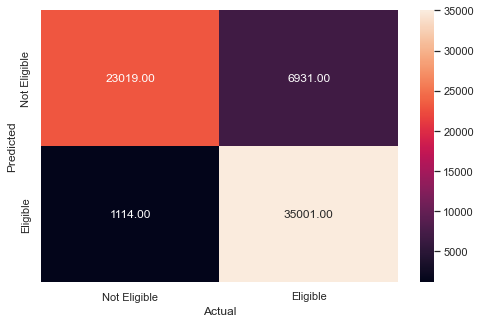

              precision    recall  f1-score   support

           0       0.95      0.76      0.85     12836
           1       0.83      0.97      0.89     15478

    accuracy                           0.88     28314
   macro avg       0.89      0.87      0.87     28314
weighted avg       0.89      0.88      0.87     28314



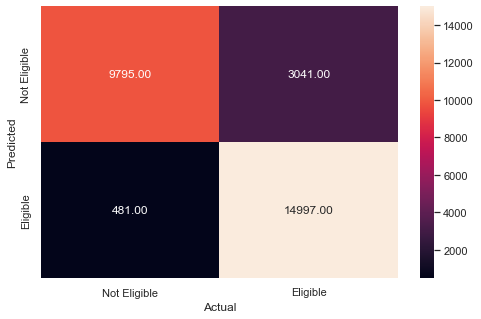

In [356]:
lg = LogisticRegression(solver = 'newton-cg',class_weight={0:0.2, 1:0.8})
lg.fit(X_train,Y_train)
Y_pred_train = lg.predict(X_train)
metrics_score(Y_train,Y_pred_train)

Y_pred_test = lg.predict(X_test)
metrics_score(Y_test,Y_pred_test)



In [499]:
d_tree = DecisionTreeClassifier(max_depth=15, random_state=1)
d_tree_tuned = DecisionTreeClassifier(class_weight = {0:0.2, 1:0.8}, random_state=1)

In [ ]:
d_tree.fit(X_train,Y_train)
Y_pred_train = d_tree.predict(X_train)
metrics_score(Y_train,Y_pred_train)

Y_pred_test = d_tree.predict(X_test)
metrics_score(Y_test,Y_pred_test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



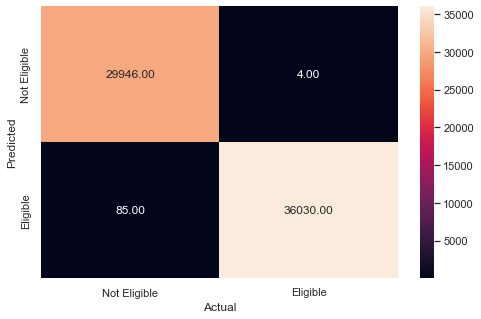

In [490]:
rf_estimator_tuned = RandomForestClassifier(n_estimators=230, max_depth= 25, max_features= 15, random_state = 100)

rf_estimator_tuned.fit(X_train,Y_train)

y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(Y_train, y_pred_train5)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     12836
           1       0.96      0.95      0.95     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



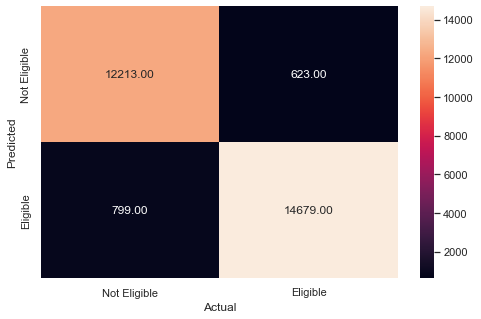

In [491]:
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(Y_test, y_pred_test5)

In [492]:
travel_test1 = pd.read_csv("C:/Users/kulpu/Downloads/Traveldata_test_(2).csv")
survey_test1 = pd.read_csv("C:/Users/kulpu/Downloads/Surveydata_test_(2).csv")



In [493]:
combined_data1 = pd.merge(travel_test1,survey_test1)

In [494]:
objvar1 = combined_data1.select_dtypes("object").columns
numvar1 = combined_data1.select_dtypes('number').columns

In [495]:
# Convert the object data types to Categorical.
cols = combined_data1.select_dtypes('object').columns.tolist()
#cols.append('Overall_Experience')

for var in cols:
    combined_data1[var]=combined_data1[var].astype('category')

# No significant missing values. Can replace all with K-NN method.

# define imputer
from sklearn.impute import KNNImputer
from numpy import isnan
data = combined_data1[numvar1].values
ix = [i for i in range(data.shape[1])]
X = data[:, ix]
print(X)
print('Missing: %d' % sum(isnan(X).flatten()))
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(X)
data_trans = imputer.transform(X)
data_trans1 = pd.DataFrame(data_trans)
data_trans1 = data_trans1.rename(columns = {0:'ID',1:'AGE_C',2:'Travel_Distance_C',3:'Departure Delay (Mins)_C',4:'Arrival Delay (Mins)_C'})

data_trans1['ID'] = data_trans1['ID'].astype('int')
data_trans1.head()
data_trans1.info()

[[9.9900001e+07 3.6000000e+01 5.3200000e+02 0.0000000e+00 0.0000000e+00]
 [9.9900002e+07 2.1000000e+01 1.4250000e+03 9.0000000e+00 2.8000000e+01]
 [9.9900003e+07 6.0000000e+01 2.8320000e+03 0.0000000e+00 0.0000000e+00]
 ...
 [9.9935600e+07 2.2000000e+01 1.1800000e+03 0.0000000e+00 0.0000000e+00]
 [9.9935601e+07 6.7000000e+01 4.2000000e+02 2.3000000e+01 1.6000000e+01]
 [9.9935602e+07 2.0000000e+01 1.6800000e+03 0.0000000e+00 0.0000000e+00]]
Missing: 163
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        35602 non-null  int32  
 1   AGE_C                     35602 non-null  float64
 2   Travel_Distance_C         35602 non-null  float64
 3   Departure Delay (Mins)_C  35602 non-null  float64
 4   Arrival Delay (Mins)_C    35602 non-null  float64
dtypes: float64(4), int32(1)
memory usage: 1.2 MB


In [496]:
# Replace Outliers in the data:

##NOTE: THE OUTLIERS REPLACEMENT NEEDS TO BE INVESTIGATED VERY THOROUGHLY
##      PRIOR TO FINALIZING IT FOR THE MODELS


def treat_outliers(cleaned_data,col):
    
    Q1=cleaned_data[col].quantile(0.25)# 25th quantile
    Q3=cleaned_data[col].quantile(0.75)  # 75th quantile
    IQR=  Q3 - Q1 # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR  # define upper Whisker
    cleaned_data[col] = np.clip(cleaned_data[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return cleaned_data

def treat_outliers_all(cleaned_data, col_list):
    for c in col_list:
        cleaned_data = treat_outliers(cleaned_data,c)
        
    return cleaned_data
        
df_raw1 = cleaned_data1.copy()
print(df_raw1.info())

## We want to replace the missing values for departure delay, arrival delay and the travel distance. 
numerical_col1 = df_raw1[['Departure_Delay_In_Mins','Arrival_Delay_In_Mins','Travel_Distance']].columns.tolist()# getting list of numerical columns


cleaned_data1 = treat_outliers_all(df_raw1,numerical_col1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       35602 non-null  int64   
 1   Gender                   35602 non-null  category
 2   Customer_Type            35602 non-null  category
 3   Type_Travel              35602 non-null  category
 4   Travel_Class             35602 non-null  category
 5   Seat_Comfort             35602 non-null  category
 6   Seat_Class               35602 non-null  category
 7   Arrival_Time_Convenient  35602 non-null  category
 8   Catering                 35602 non-null  category
 9   Platform_Location        35602 non-null  category
 10  Onboard_Wifi_Service     35602 non-null  category
 11  Onboard_Entertainment    35602 non-null  category
 12  Online_Support           35602 non-null  category
 13  Ease_of_Online_Booking   35602 non-null  category
 14  Onboar

In [497]:
#Z1 = cleaned_data1.drop(columns = 'Overall_Experience',axis=1) 
# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
cat_col1 = cleaned_data1.select_dtypes('category').columns.tolist()
X1 = pd.get_dummies(cleaned_data1, columns = cat_col1, drop_first=True)
X1.info()
#columns = Z.select_dtypes('uint8').columns.tolist()
#for i in columns:
 #   Z[i] = Z[i].astype('float64')
# Create y(dependent varibale)
# Remove _________ and complete the code

#X1 = X1.drop(columns = ['Onboard_Service_Extremely Poor','CheckIn_Service_Extremely Poor','Cleanliness_Extremely Poor'],axis=1)
#Y1 = cleaned_data1['Overall_Experience']

######## Scaling the data 
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()

X_scaled1 = ss.fit_transform(X1)


y_pred_train6 = rf_estimator_tuned.predict(X_scaled1)

y_pred_train6

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         35602 non-null  int64  
 1   Age                                        35602 non-null  float64
 2   Travel_Distance                            35602 non-null  float64
 3   Departure_Delay_In_Mins                    35602 non-null  float64
 4   Arrival_Delay_In_Mins                      35602 non-null  float64
 5   Gender_Male                                35602 non-null  uint8  
 6   Customer_Type_Loyal Customer               35602 non-null  uint8  
 7   Type_Travel_Personal Travel                35602 non-null  uint8  
 8   Travel_Class_Eco                           35602 non-null  uint8  
 9   Seat_Comfort_Excellent                     35602 non-null  uint8  
 10  Seat_Comfort_Extremely

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [498]:
y_pred_train6.tofile('file_name.csv', sep='\n')


In [ ]:
ada1 = AdaBoostClassifier(base_estimator=rf, n_estimators=50, learning_rate=0.01, random_state= 88)

ada1.fit(X_train,Y_train)
y_pred_train7 = ada1.predict(X_scaled1)

In [ ]:
y_pred_train7.tofile('file_name1.csv', sep='\n')
